# DRUG TOXICITY CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
# lOAD DATA
zipe = zipfile.ZipFile("archive (24).zip")
zipe.extractall()

In [3]:
chem_df = pd.read_csv("PubChem Compound Cache.csv")

In [4]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117477 entries, 0 to 117476
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0    cid                    117477 non-null  int64  
 1   cmpdname                117477 non-null  object 
 2   cmpdsynonym             117397 non-null  object 
 3   mw                      117477 non-null  float64
 4   mf                      117477 non-null  object 
 5   polararea               117477 non-null  float64
 6   complexity              117477 non-null  float64
 7   xlogp                   76915 non-null   float64
 8   heavycnt                117477 non-null  int64  
 9   hbonddonor              117477 non-null  int64  
 10  hbondacc                117477 non-null  int64  
 11  rotbonds                117477 non-null  int64  
 12  inchi                   117477 non-null  object 
 13  smiles                  117477 non-null  object 
 14  inchikey            

In [5]:
chem_df

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,4,1-Aminopropan-2-ol,1-Aminopropan-2-ol|78-96-6|1-AMINO-2-PROPANOL|...,75.11,C3H9NO,46.3,22.9,-1.0,5,2,...,75460,31266,NaN,Biological Test Results|Interactions and Pathw...,15,155|157|161|165|167|175|1188|23443|158688|6516...,20050326,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,6,Dinitrochlorobenzene,"1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,12139,4796,Dinitrochlorobenzene,Biological Test Results|Interactions and Pathw...,17,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,10X CHEM|3B Scientific (Wuhan) Corp|3WAY PHARM...,Chemical Vendors|Curation Efforts|Governmental...,C308 - Immunotherapeutic Agent > C2139 - Immun...
2,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,46484,25937,NaN,Agrochemical Information|Biological Test Resul...,19,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,13,"1,2,4-Trichlorobenzene","1,2,4-trichlorobenzene|120-82-1|Benzene, 1,2,4...",181.40,C6H3Cl3,0.0,94.3,4.0,9,0,...,53502,17140,NaN,Biological Test Results|Interactions and Pathw...,15,155|157|161|165|167|175|421|426|427|433|434|43...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,19,"2,3-Dihydroxybenzoic acid","2,3-Dihydroxybenzoic acid|303-38-8|Pyrocatechu...",154.12,C7H6O4,77.8,157.0,1.2,11,3,...,20142,7609,NaN,Biological Test Results|Interactions and Pathw...,16,330|608|1033|1376|1385|1422|1465|1511|1529|153...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,D064449 - Sequestering Agents > D002614 - Chel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117472,171391248,Dicopper;tetrasodium;5-amino-3-[[4-[4-[(8-amin...,DIRECT BLUE 218|HY-D1035|CS-0085719,1087.80,C32H16Cu2N6Na4O16S4,456.0,1880.0,NaN,64,2,...,0,0,NaN,Chemical and Physical Properties|Literature|Sa...,5,NaN,20240530,AbaChemScene|MedChemexpress MCE,Chemical Vendors,NaN
117473,171706620,"2,3-bis[[(E)-12-hydroxynonadec-9-enoyl]oxy]pro...",Hemicellulase|9025-56-3,975.50,C60H110O9,140.0,1150.0,19.4,69,3,...,0,0,NaN,Chemical and Physical Properties|Classificatio...,7,NaN,20240704,10X CHEM|AppChem|MolPort,Chemical Vendors,NaN
117474,171975744,"Potassium;1,3-dichloro-1,3,5-triazinane-2,4,6-...",Troclosene potassium|2244-21-5,238.07,C3H2Cl2KN3O3,69.7,220.0,NaN,12,1,...,0,0,NaN,Agrochemical Information|Chemical and Physical...,8,NaN,20240926,InvivoChem,Chemical Vendors,NaN
117475,172015413,"(2R)-2-[2-[(5S,6R,7S,9S,11S,16S,18R,19S)-19-am...","fumonisin b1|1217458-62-2|2-[2-[19-amino-6-(3,...",755.58,C34H59NO15,289.0,1070.0,-0.5,50,8,...,0,0,NaN,Chemical and Physical Properties|Classificatio...,9,NaN,20241008,InvivoChem,Chemical Vendors,NaN


In [6]:
chem_df.dropna(inplace = True)

In [7]:
chem_df["hbonddonor"].unique()

array([ 0,  3,  2,  4,  1, 12,  5,  6, 13,  7,  8, 11, 18, 10, 14,  9, 19,
       15, 17, 20, 16, 22, 21, 24, 42, 52, 63, 93, 55, 41, 54, 29, 58, 96,
       78], dtype=int64)

In [8]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2249 entries, 1 to 117172
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    cid                    2249 non-null   int64  
 1   cmpdname                2249 non-null   object 
 2   cmpdsynonym             2249 non-null   object 
 3   mw                      2249 non-null   float64
 4   mf                      2249 non-null   object 
 5   polararea               2249 non-null   float64
 6   complexity              2249 non-null   float64
 7   xlogp                   2249 non-null   float64
 8   heavycnt                2249 non-null   int64  
 9   hbonddonor              2249 non-null   int64  
 10  hbondacc                2249 non-null   int64  
 11  rotbonds                2249 non-null   int64  
 12  inchi                   2249 non-null   object 
 13  smiles                  2249 non-null   object 
 14  inchikey                2249 non-null   obj

In [9]:
chem_df.columns

Index([' cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea',
       'complexity', 'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds',
       'inchi', 'smiles', 'inchikey', 'iupacname', 'exactmass',
       'monoisotopicmass', 'charge', 'covalentunitcnt', 'isotopeatomcnt',
       'totalatomstereocnt', 'definedatomstereocnt', 'undefinedatomstereocnt',
       'totalbondstereocnt', 'definedbondstereocnt', 'undefinedbondstereocnt',
       'pclidcnt', 'gpidcnt', 'gpfamilycnt', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')

In [10]:
chem_df.describe()

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate
count,2.249000e+03,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,...,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2.249000e+03,2249.000000,2249.000000,2.249000e+03
mean,6.235277e+06,404.979832,114.851170,638.240462,1.709071,27.925300,2.929747,6.337483,6.038239,404.618784,...,2.831481,0.694976,0.238773,0.209871,0.028902,10079.652735,3.544441e+04,11512.076923,15.065362,2.005543e+07
std,2.188154e+07,399.393927,169.763214,951.097922,3.127954,28.057036,5.746533,6.892245,11.141494,399.244145,...,5.373221,2.427668,0.819789,0.770029,0.282277,26822.619196,6.925135e+04,33447.430228,2.525263,2.361633e+04
min,6.000000e+00,18.998000,0.000000,0.000000,-25.400000,1.000000,0.000000,0.000000,0.000000,18.998400,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,5.000000,2.004092e+07
25%,4.680000e+03,233.690000,43.800000,254.000000,0.200000,16.000000,1.000000,3.000000,2.000000,233.178000,...,0.000000,0.000000,0.000000,0.000000,0.000000,925.000000,4.022000e+03,1162.000000,14.000000,2.005032e+07
50%,1.677900e+04,317.220000,75.800000,427.000000,2.000000,22.000000,2.000000,5.000000,4.000000,316.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2777.000000,1.563200e+04,4022.000000,16.000000,2.005033e+07
75%,1.268111e+06,434.500000,124.000000,702.000000,3.500000,30.000000,3.000000,7.000000,7.000000,434.164000,...,4.000000,0.000000,0.000000,0.000000,0.000000,8175.000000,4.209300e+04,11053.000000,17.000000,2.005063e+07
max,1.559703e+08,6511.000000,2820.000000,16700.000000,13.500000,454.000000,96.000000,97.000000,193.000000,6510.050000,...,57.000000,37.000000,9.000000,9.000000,7.000000,501255.000000,1.386293e+06,767933.000000,20.000000,2.021072e+07


In [11]:
chem_df.reset_index(drop = True,inplace = True)

In [12]:
chem_df["annothits"].value_counts()

annothits
Biological Test Results|Interactions and Pathways|Chemical and Physical Properties|Classification|Drug and Medication Information|Literature|Patents|Pharmacology and Biochemistry|Safety and Hazards|Toxicity|Use and Manufacturing|Associated Disorders and Diseases|Spectral Information|Biological Test Results: Active|Biological Test Results: Micromolar|Biological Test Results: Nanomolar                            145
Biological Test Results|Interactions and Pathways|Chemical and Physical Properties|Classification|Drug and Medication Information|Identification|Literature|Patents|Pharmacology and Biochemistry|Safety and Hazards|Toxicity|Use and Manufacturing|Associated Disorders and Diseases|Spectral Information|Biological Test Results: Active|Biological Test Results: Micromolar|Biological Test Results: Nanomolar             136
Biological Test Results|Interactions and Pathways|Chemical and Physical Properties|Classification|Drug and Medication Information|Identification|Literatur

In [13]:
Test_result = chem_df[chem_df["annothits"] == 'Biological Test Results|Interactions and Pathways|Chemical and Physical Properties|Classification|Drug and Medication Information|Food Additives and Ingredients|Identification|Literature|Patents|Pharmacology and Biochemistry|Safety and Hazards|Toxicity|Use and Manufacturing|Associated Disorders and Diseases|Spectral Information|Biological Test Results: Active|Biological Test Results: Micromolar']

In [14]:
Test_result[Test_result["complexity"] == 538.0]

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
1176,25249,Stanozolol,stanozolol|Winstrol|Androstanazole|Androstanaz...,328.5,C21H32N2O,48.9,538.0,4.5,24,2,...,8003,1859,Stanozolol,Biological Test Results|Interactions and Pathw...,17,588211|588212|588213|624349|625144|625145|6251...,20050326,001Chemical|AbaChemScene|ABI Chem|Achemo Scien...,Chemical Vendors|Curation Efforts|Governmental...,A - Alimentary tract and metabolism > A14 - An...


In [15]:
Test_result.sort_values(by = "complexity",ascending = False)
plot_val = Test_result[["complexity","annotation"]].iloc[:6]
plot_val

,complexity,annotation
0,224.0,C308 - Immunotherapeutic Agent > C2139 - Immun...
312,211.0,C78281 - Agent Affecting Musculoskeletal Syste...
594,26.5,C254 - Anti-Infective Agent > C276 - Antiparas...
683,320.0,C254 - Anti-Infective Agent > C29739 - Sulfona...
846,236.0,D004396 - Coloring Agents|D009676 - Noxae > D0...
952,54.9,D009676 - Noxae > D002273 - Carcinogens


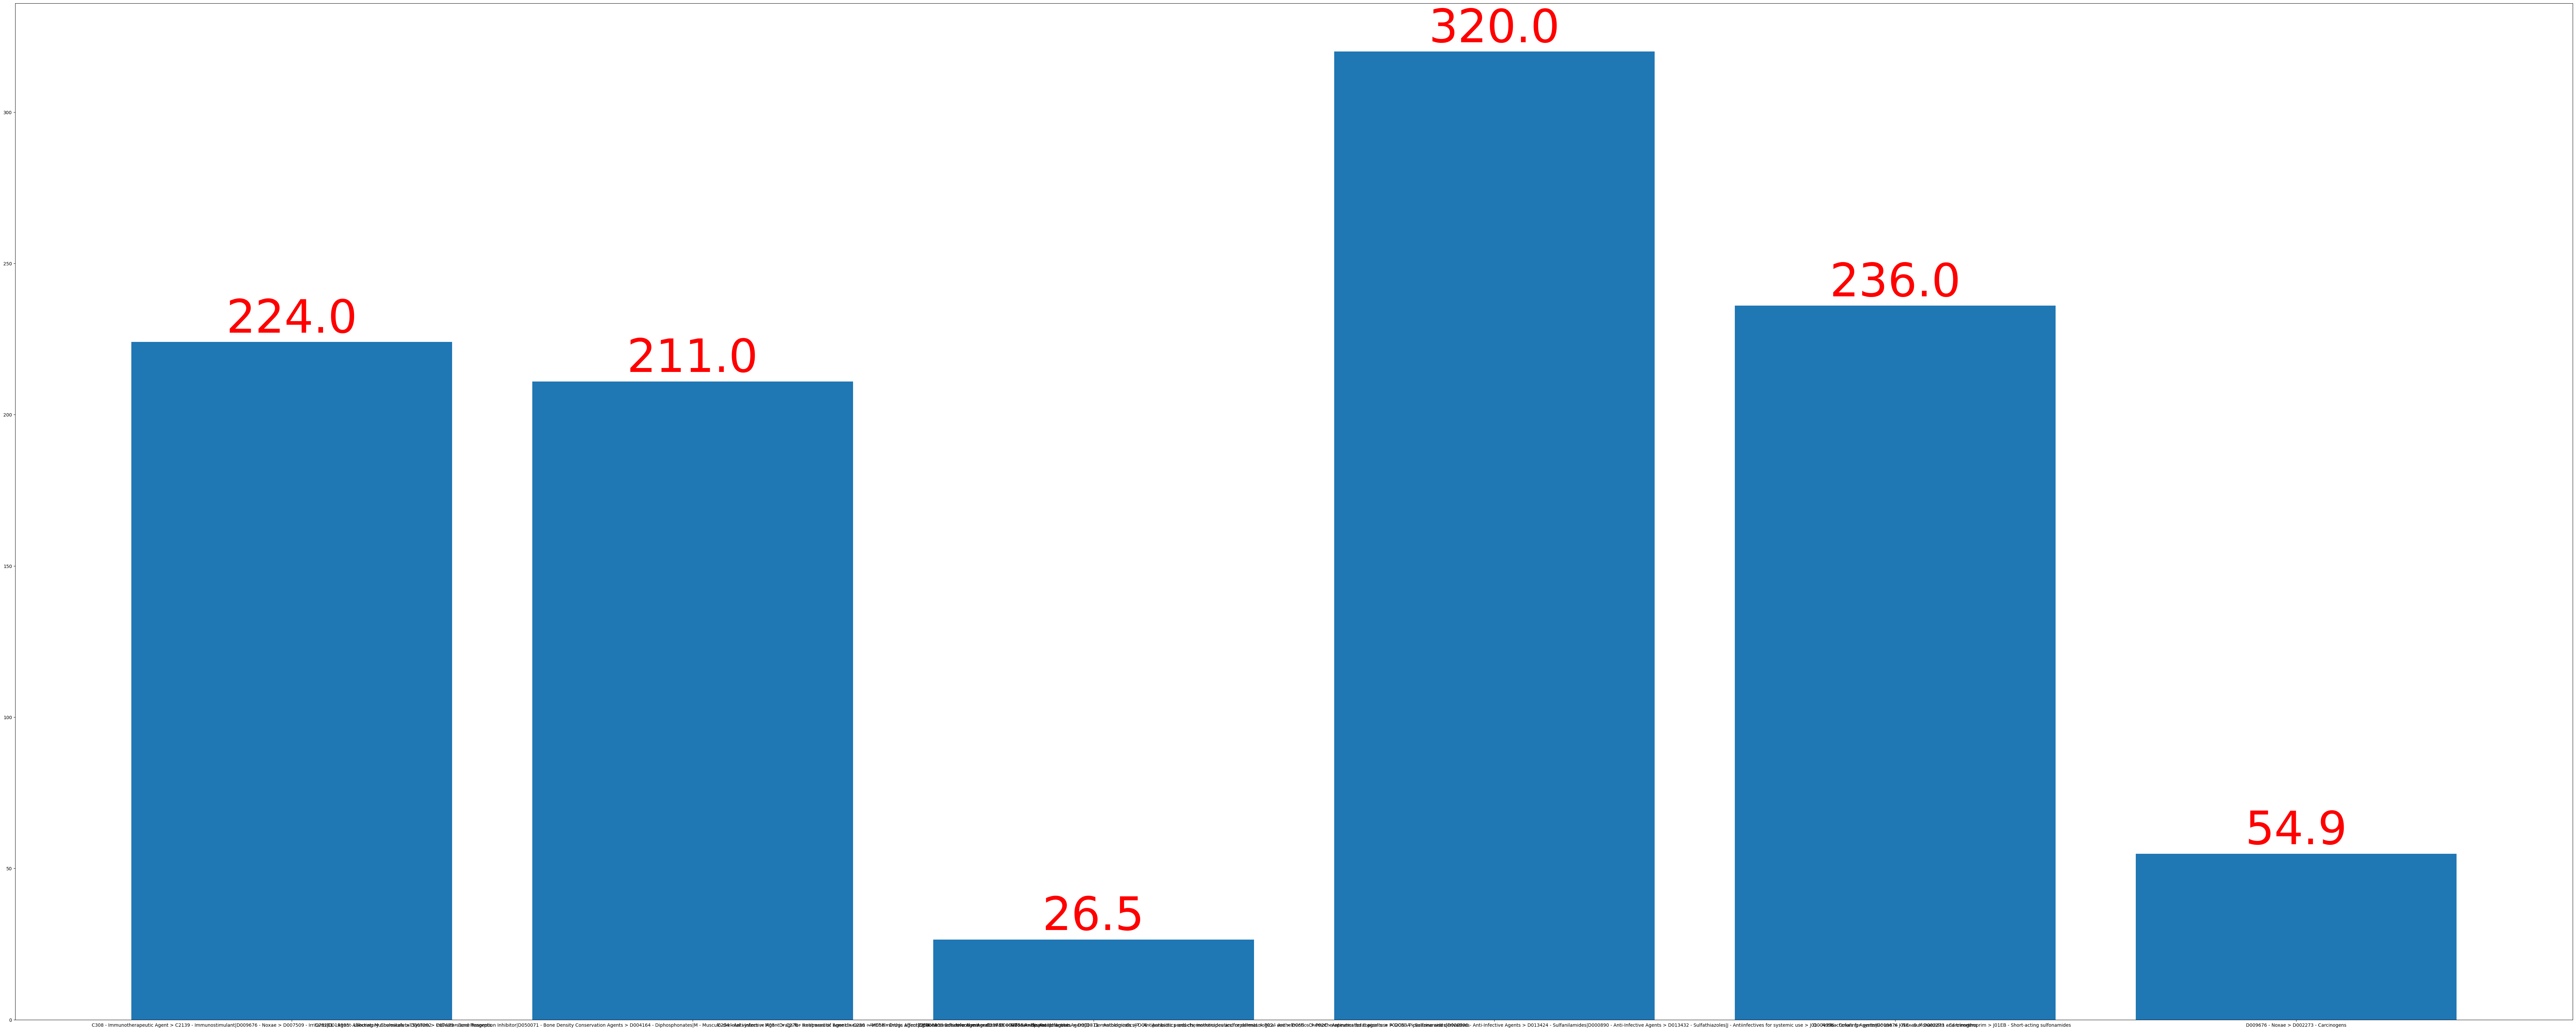

In [16]:
plt.figure(figsize = (100,40))
bar = plt.bar(plot_val["annotation"],plot_val["complexity"])
plt.bar_label(bar,plot_val["complexity"],fontsize = 100,color = "red")
plt.show();

In [17]:
test_chem = chem_df.sort_values(by = "complexity",ascending = False)
chem_val = test_chem[["complexity","annotation"]].iloc[:10]
chem_val

,complexity,annotation
2080,16700.0,B - Blood and blood forming organs > B02 - Ant...
2180,15400.0,"D006730 - Hormones, Hormone Substitutes, and H..."
2189,14600.0,"D006730 - Hormones, Hormone Substitutes, and H..."
2079,11200.0,C254 - Anti-Infective Agent > C281 - Antiviral...
2082,11200.0,C147908 - Hormone Therapy Agent > C548 - Thera...
2154,10300.0,A - Alimentary tract and metabolism > A10 - Dr...
2088,8760.0,A - Alimentary tract and metabolism > A10 - Dr...
2084,8160.0,C147908 - Hormone Therapy Agent > C548 - Thera...
2100,7970.0,C147908 - Hormone Therapy Agent > C548 - Thera...
2247,7840.0,C254 - Anti-Infective Agent > C258 - Antibioti...


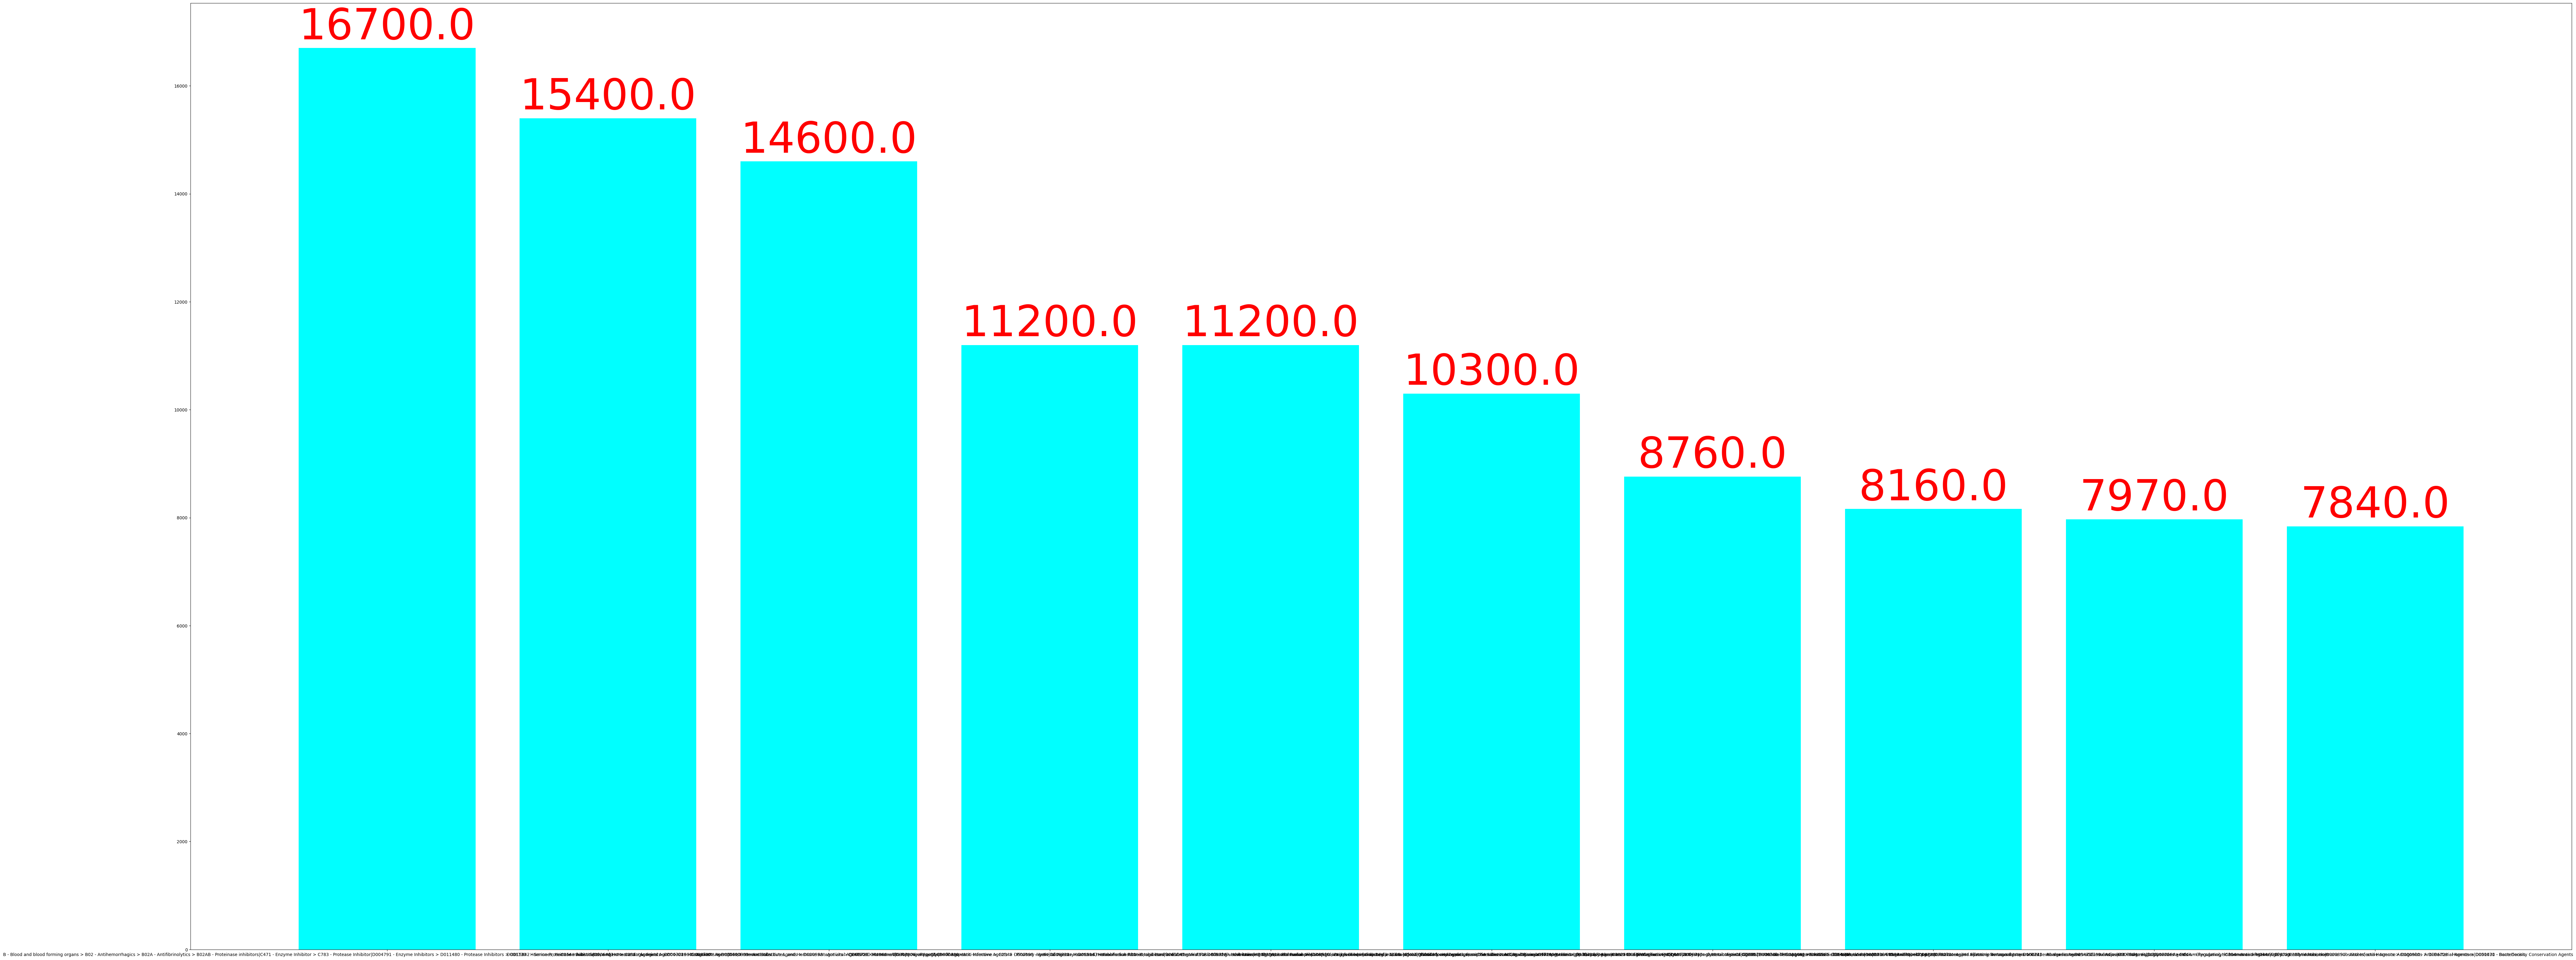

In [18]:
plt.figure(figsize = (100,40))
bar = plt.bar(chem_val["annotation"],chem_val["complexity"],color = "aqua")
plt.bar_label(bar,chem_val["complexity"],fontsize = 100,color = "red")
plt.show();

In [19]:
polarity_Test = chem_df.sort_values(by = "polararea",ascending = False)
polarity = polarity_Test[["cmpdname","polararea"]].iloc[:15]
polarity

,cmpdname,polararea
2080,Trasylol,2820.0
2180,Urogastrone,2560.0
2189,Insulin,2450.0
2079,Enfuvirtide,1900.0
2082,Acthargel,1860.0
2154,Byetta,1780.0
2100,Calcitonin Salmon,1560.0
2084,Glucagon,1560.0
2088,Liraglutide,1510.0
2075,Secrepan,1420.0


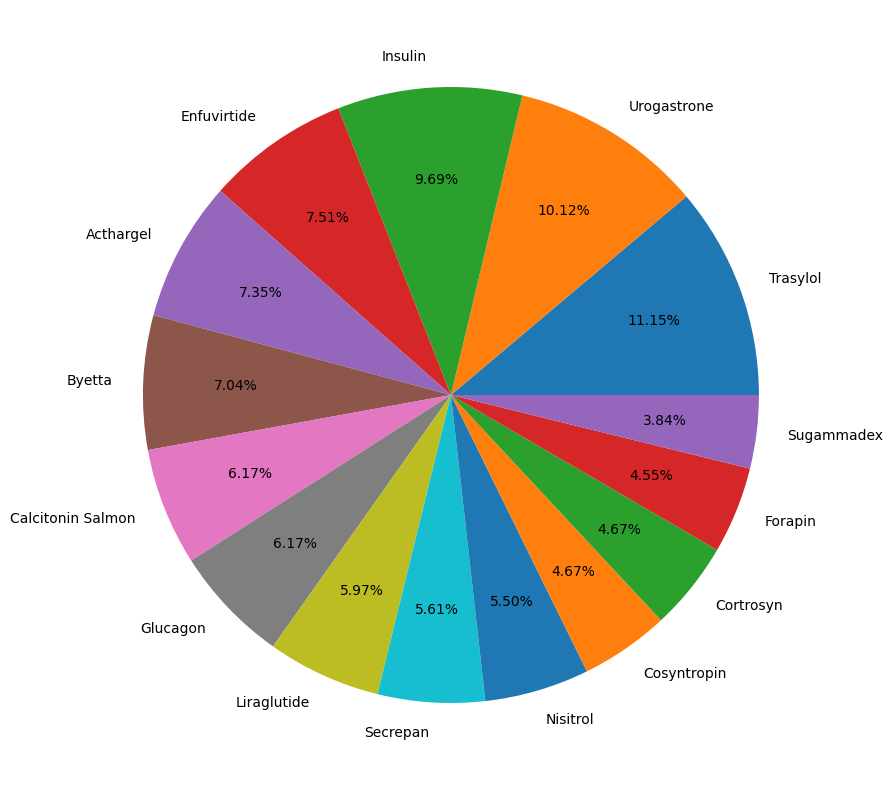

In [20]:
plt.figure(figsize = (20,10))
plt.pie(polarity["polararea"],labels = polarity["cmpdname"],autopct = "%0.2f%%",pctdistance = 0.7)
plt.show();

In [21]:
protein_chem = chem_df.sort_values(by = "gpfamilycnt",ascending = False)
protein_val = protein_chem[["gpfamilycnt","cmpdname"]].iloc[:10]
protein_val

,gpfamilycnt,cmpdname
62,767933,Oxygen
40,721748,Ethanol
57,535708,Nitrogen
22,389843,Hydrochloric Acid
26,278082,Hydrogen Sulfide
308,248716,Diethyl Ether
51,243180,Methanol
17,214335,Carbon Monoxide
11,212036,Benzoic Acid
883,199828,Mannitol


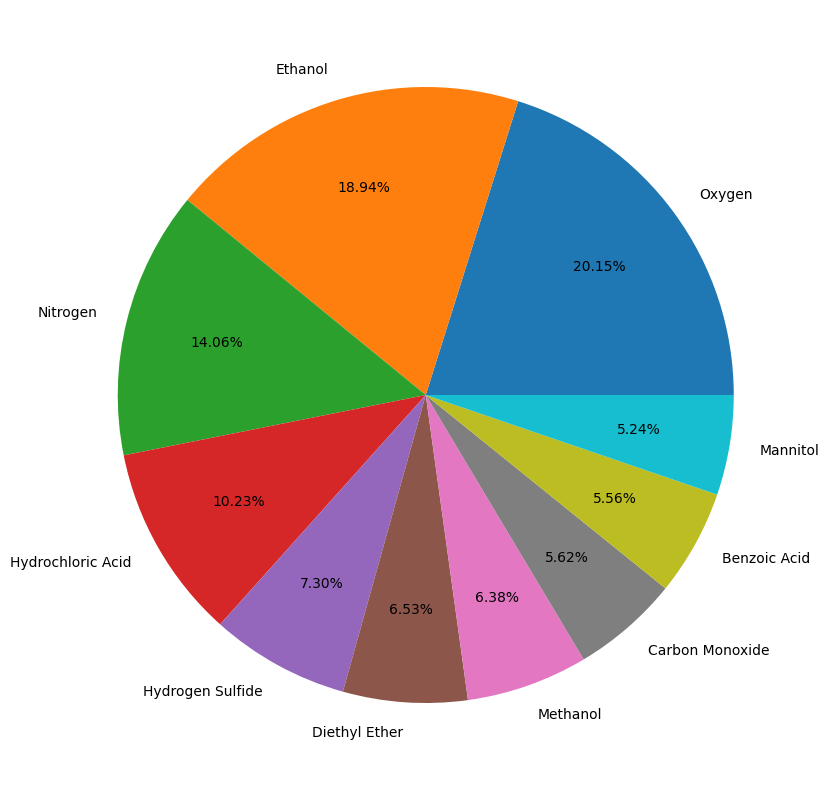

In [22]:
plt.figure(figsize = (20,10))
plt.pie(protein_val["gpfamilycnt"],labels = protein_val["cmpdname"],autopct = "%0.2f%%",pctdistance = 0.7)
plt.show();

In [23]:
chem_df.drop(columns = ["cmpdname","cmpdsynonym","mf","inchi","smiles","inchikey","iupacname","meshheadings","annothits","aids","sidsrcname","depcatg","annotation"],axis = 1,inplace  = True)

In [24]:
chem_df.describe()

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate
count,2.249000e+03,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,...,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2.249000e+03,2249.000000,2249.000000,2.249000e+03
mean,6.235277e+06,404.979832,114.851170,638.240462,1.709071,27.925300,2.929747,6.337483,6.038239,404.618784,...,2.831481,0.694976,0.238773,0.209871,0.028902,10079.652735,3.544441e+04,11512.076923,15.065362,2.005543e+07
std,2.188154e+07,399.393927,169.763214,951.097922,3.127954,28.057036,5.746533,6.892245,11.141494,399.244145,...,5.373221,2.427668,0.819789,0.770029,0.282277,26822.619196,6.925135e+04,33447.430228,2.525263,2.361633e+04
min,6.000000e+00,18.998000,0.000000,0.000000,-25.400000,1.000000,0.000000,0.000000,0.000000,18.998400,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,5.000000,2.004092e+07
25%,4.680000e+03,233.690000,43.800000,254.000000,0.200000,16.000000,1.000000,3.000000,2.000000,233.178000,...,0.000000,0.000000,0.000000,0.000000,0.000000,925.000000,4.022000e+03,1162.000000,14.000000,2.005032e+07
50%,1.677900e+04,317.220000,75.800000,427.000000,2.000000,22.000000,2.000000,5.000000,4.000000,316.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2777.000000,1.563200e+04,4022.000000,16.000000,2.005033e+07
75%,1.268111e+06,434.500000,124.000000,702.000000,3.500000,30.000000,3.000000,7.000000,7.000000,434.164000,...,4.000000,0.000000,0.000000,0.000000,0.000000,8175.000000,4.209300e+04,11053.000000,17.000000,2.005063e+07
max,1.559703e+08,6511.000000,2820.000000,16700.000000,13.500000,454.000000,96.000000,97.000000,193.000000,6510.050000,...,57.000000,37.000000,9.000000,9.000000,7.000000,501255.000000,1.386293e+06,767933.000000,20.000000,2.021072e+07


In [34]:
chem_df["toxicity_label"] = (chem_df["xlogp"] > 5) | (chem_df["mw"] > 500) | (chem_df["hbondacc"] > 10)
chem_df["toxicity_label"] = chem_df["toxicity_label"].astype(int)  # Convert to 0 (non-toxic) or 1 (toxic)


In [35]:
chem_df["toxicity_label"].value_counts()

toxicity_label
0    1653
1     596
Name: count, dtype: int64

In [38]:
X = chem_df.iloc[:,:-1]
y = chem_df.iloc[:,-1]


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x,Y = smote.fit_resample(X,y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.3,random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
scale =  StandardScaler()
xx_train = scale.fit_transform(x_train)
xx_test = scale.transform(x_test)

In [56]:
import tensorflow as tf
# set seed
tf.random.set_seed(42)

#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation = "sigmoid")
    
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

mod_hist = model.fit(xx_train,y_train,epochs = 10)

Epoch 1/10
73/73 [==============================] - 2s 3ms/step - loss: 0.3490 - accuracy: 0.8570
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 0.1661 - accuracy: 0.9274
Epoch 3/10
73/73 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9481
Epoch 4/10
73/73 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9525
Epoch 5/10
73/73 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9503
Epoch 6/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9598
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9620
Epoch 8/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9628
Epoch 9/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9702
Epoch 10/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9697


<Axes: >

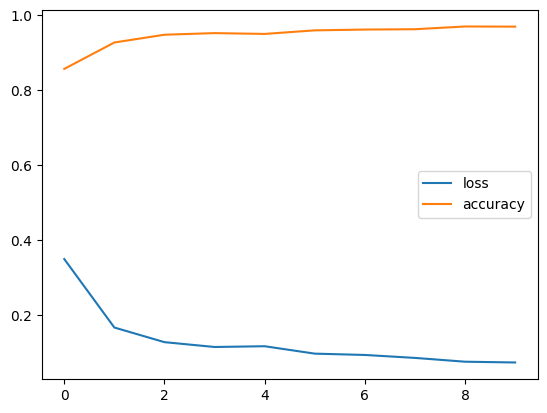

In [57]:
pd.DataFrame(mod_hist.history).plot()

In [58]:
model.evaluate(xx_test,y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9677


[0.08894573897123337, 0.9677419066429138]

In [65]:
preda = model.predict(xx_test)
pred = (preda >= 0.5).astype(int)

31/31 [==============================] - 0s 2ms/step


In [78]:
print(tf.squeeze(pred)[:100])
print()
print("💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻")
print()
print(list(y_test[:100]))

tf.Tensor(
[1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1], shape=(100,), dtype=int32)

💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [81]:
from sklearn.metrics import classification_report,confusion_matrix
clfr = classification_report(y_test,pred)
conf = confusion_matrix(y_test,pred)

In [83]:
print(clfr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       505
           1       0.97      0.96      0.97       487

    accuracy                           0.97       992
   macro avg       0.97      0.97      0.97       992
weighted avg       0.97      0.97      0.97       992



In [84]:
print(conf)

[[492  13]
 [ 19 468]]


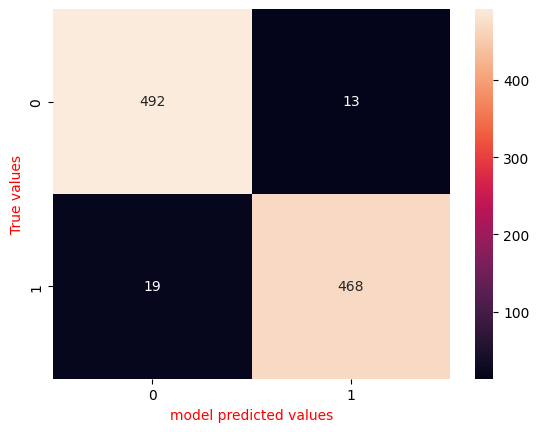

In [88]:
sns.heatmap(conf,annot = True, fmt = "d")
plt.xlabel("model predicted values",color = "red")
plt.ylabel("True values",color= "red")
plt.show();